In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Tushar\Encryptix Projects\SMS SPAM COLLECTION\spam.csv', encoding='latin-1')

In [89]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [90]:
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=0)
df = df.rename(columns={"v1":"Classification","v2":"Message"})

In [91]:
df

,Classification,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [92]:
df.describe()

,Classification,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [93]:
df.groupby('Classification').describe()

Message         \
                 count unique   
Classification                  
ham               4825   4516   
spam               747    653   

                                                                        
                                                              top freq  
Classification                                                          
ham                                        Sorry, I'll call later   30  
spam            Please call our customer service representativ...    4

In [94]:
df['Classification_num'] = df.Classification.map({'ham':0, 'spam':1})
df.head()

,Classification,Message,Classification_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [95]:
nltk.download('stopwords')

def text_process(mess):
    import string
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
df['clean_msg'] = df.Message.apply(text_process)

df.head()

,Classification,Message,Classification_num,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah think goes usf lives around though


In [113]:
vectorizer = TfidfVectorizer()
joblib.dump(vectorizer,'Tfid_vectorized.pkl')

X = vectorizer.fit_transform(df['clean_msg'])

# Extract the labels
y = df['Classification_num']

In [99]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Initialize the classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)


MultinomialNB()

In [101]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.97
Confusion Matrix:
[[965   0]
 [ 36 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [102]:


lg = LogisticRegression()

lg.fit(X_train,y_train)

lgy_pred = lg.predict(X_test)

# Calculate accuracy
accuracy_lg = accuracy_score(y_test, lgy_pred)
print(f'Accuracy: {accuracy_lg:.2f}')

# Confusion matrix
conf_matrix_lg = confusion_matrix(y_test, lgy_pred)
print('Confusion Matrix:')
print(conf_matrix_lg)

# Classification report
class_report_lg = classification_report(y_test, lgy_pred)
print('Classification Report:')
print(class_report_lg)

Accuracy: 0.94
Confusion Matrix:
[[960   5]
 [ 62  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       965
           1       0.95      0.59      0.72       150

    accuracy                           0.94      1115
   macro avg       0.94      0.79      0.85      1115
weighted avg       0.94      0.94      0.93      1115



In [103]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [104]:
rf.fit(X_train,y_train)

rfy_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, rfy_pred)
print(f'Accuracy: {accuracy_rf:.2f}')

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rfy_pred)
print('Confusion Matrix:')
print(conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_test, rfy_pred)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.97
Confusion Matrix:
[[965   0]
 [ 29 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [105]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
modely_pred = model.predict(X_test)

accuracy_model = accuracy_score(y_test, rfy_pred)
print(f'Accuracy: {accuracy_model:.2f}')

# Confusion matrix
conf_matrix_model = confusion_matrix(y_test, rfy_pred)
print('Confusion Matrix:')
print(conf_matrix_model)

# Classification report
class_report_model = classification_report(y_test, rfy_pred)
print('Classification Report:')
print(class_report_model)

Accuracy: 0.97
Confusion Matrix:
[[965   0]
 [ 29 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



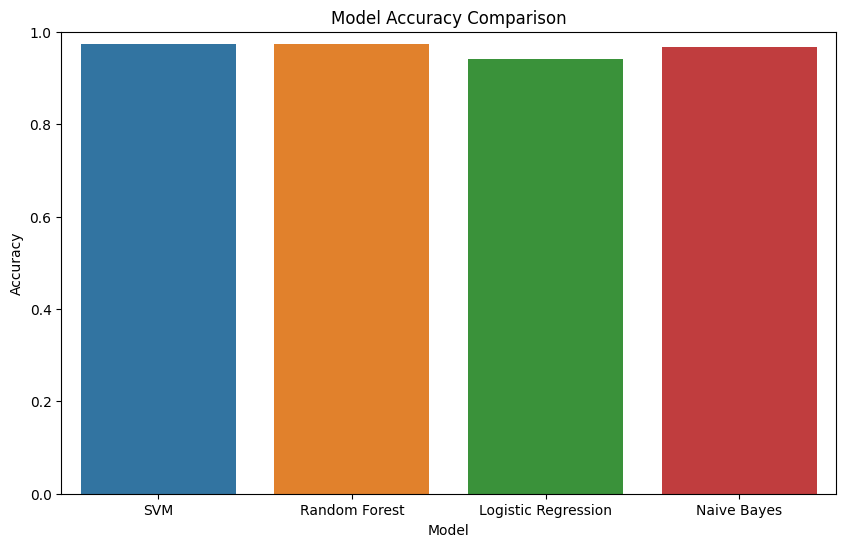

In [109]:

# Sample accuracy scores for four models
accuracy_scores = {
    'SVM': accuracy_model,
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_lg,
    'Naive Bayes': accuracy
}

# Convert the dictionary to a DataFrame for easier plotting
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to 0-1 for better comparison
plt.show()


In [110]:
sample_messages = [
    "Can we reschedule our meeting to next week?",
    "Congratulations! You have been selected for a free gift. Click here to claim now.",
    "Don't forget to send me the report by tomorrow morning.",
    "You have won a $1000 Walmart gift card. Go to www.fakeurl.com to claim.",
    "Happy birthday! Hope you have a great day.",
    "Get rich quick! Make $5000 a day from home. Visit www.scamwebsite.com",
    "Are you free for a call later today?",
    "You have received a new voicemail. Call 123-456-7890 to listen now.",
    "Can you please call me back when you get this message?",
    "Limited offer! Get a 30% discount on your next purchase. Use code SAVE30 at checkout."
]

# Preprocess each message and make predictions
for idx, message in enumerate(sample_messages, 1):
    cleaned_message = text_process(message)
    tfidf_vector = vectorizer.transform([cleaned_message])
    prediction = classifier.predict(tfidf_vector)[0]
    print(f"Message {idx}: {message}")
    print(f"Cleaned Message: {cleaned_message}")
    print(f"Prediction: {'spam' if prediction else 'ham'}")
    print()

Message 1: Can we reschedule our meeting to next week?
Cleaned Message: reschedule meeting next week
Prediction: ham

Message 2: Congratulations! You have been selected for a free gift. Click here to claim now.
Cleaned Message: Congratulations selected free gift Click claim
Prediction: spam

Message 3: Don't forget to send me the report by tomorrow morning.
Cleaned Message: forget send report tomorrow morning
Prediction: ham

Message 4: You have won a $1000 Walmart gift card. Go to www.fakeurl.com to claim.
Cleaned Message: 1000 Walmart gift card Go wwwfakeurlcom claim
Prediction: spam

Message 5: Happy birthday! Hope you have a great day.
Cleaned Message: Happy birthday Hope great day
Prediction: ham

Message 6: Get rich quick! Make $5000 a day from home. Visit www.scamwebsite.com
Cleaned Message: Get rich quick Make 5000 day home Visit wwwscamwebsitecom
Prediction: ham

Message 7: Are you free for a call later today?
Cleaned Message: free call later today
Prediction: ham

Message 8: 